In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
ecommerce = pd.read_csv('/content/Ecommerce_Sales_Prediction_Dataset.csv')
df = ecommerce.copy()
df.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [6]:
df.shape

(1000, 7)

## EDA

In [7]:
df.isnull().sum()

,0
Date,0
Product_Category,0
Price,0
Discount,0
Customer_Segment,0
Marketing_Spend,0
Units_Sold,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1000.0,505.24192,289.791248,14.59,243.3425,509.310,747.5925,999.42
Discount,1000.0,24.91975,14.439951,0.01,12.9950,24.965,37.5625,49.92
Marketing_Spend,1000.0,4912.83024,2840.602656,100.30,2413.0200,4837.245,7319.6750,9995.62
Units_Sold,1000.0,29.63100,7.267989,5.00,24.0000,30.000,34.0000,57.00


### Correlation Matrix

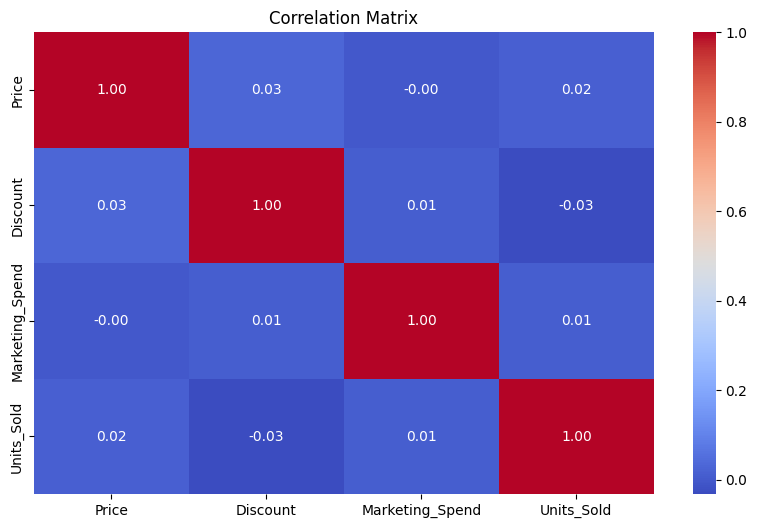

In [9]:
df_numerical = df.select_dtypes(include = ['Float64','int64'])
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Distribution of units sold by product categories

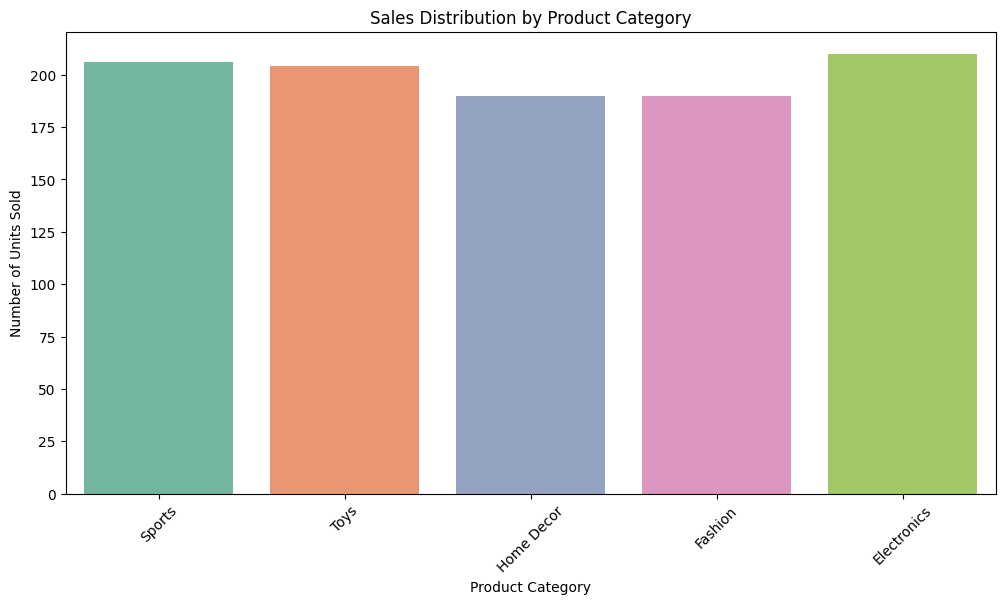

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product_Category', palette='Set2')
plt.title('Sales Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Units Sold')
plt.xticks(rotation=45)
plt.show()

### Price Distribution

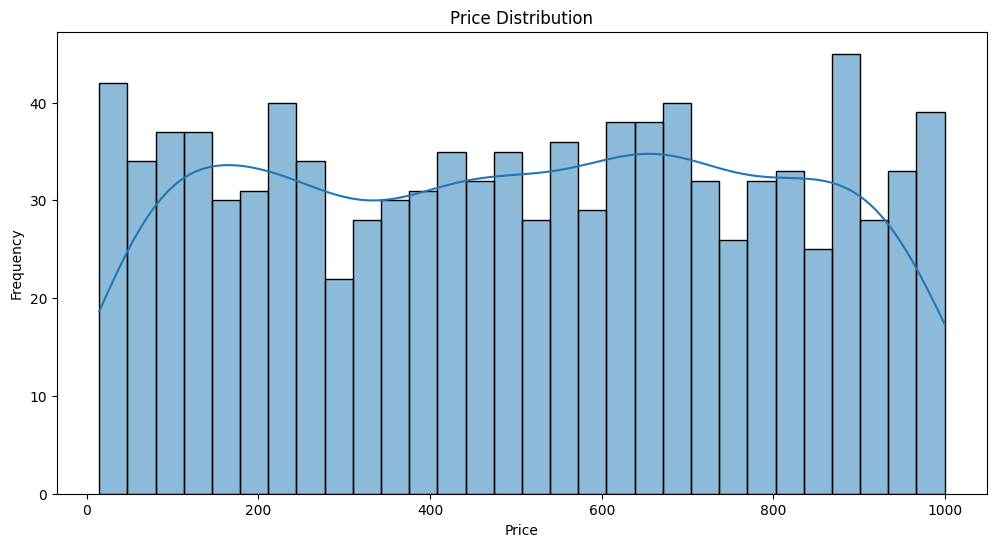

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Distribution of Discount Rates

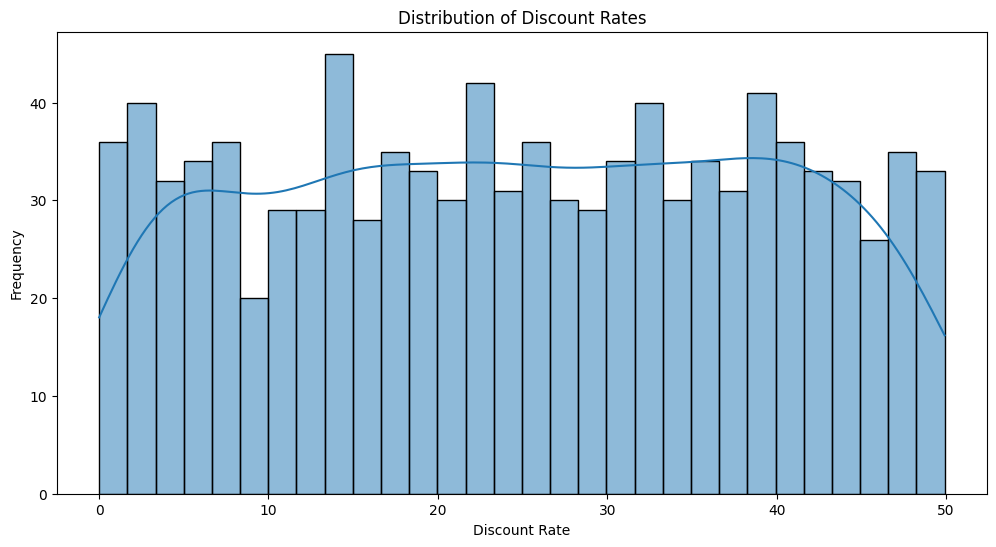

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Discount'], bins=30, kde=True, palette='Set2')
plt.title('Distribution of Discount Rates')
plt.xlabel('Discount Rate')
plt.ylabel('Frequency')
plt.show()

### Sales by Customer Segment

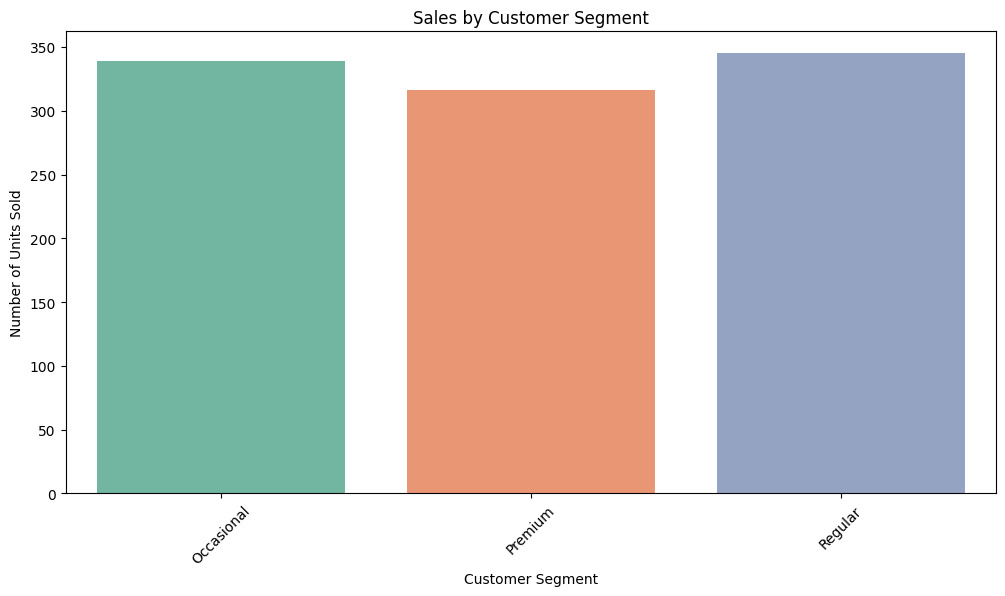

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Customer_Segment', palette='Set2')
plt.title('Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Units Sold')
plt.xticks(rotation=45)
plt.show()

### Relationship Between Marketing Spend and Units Sold

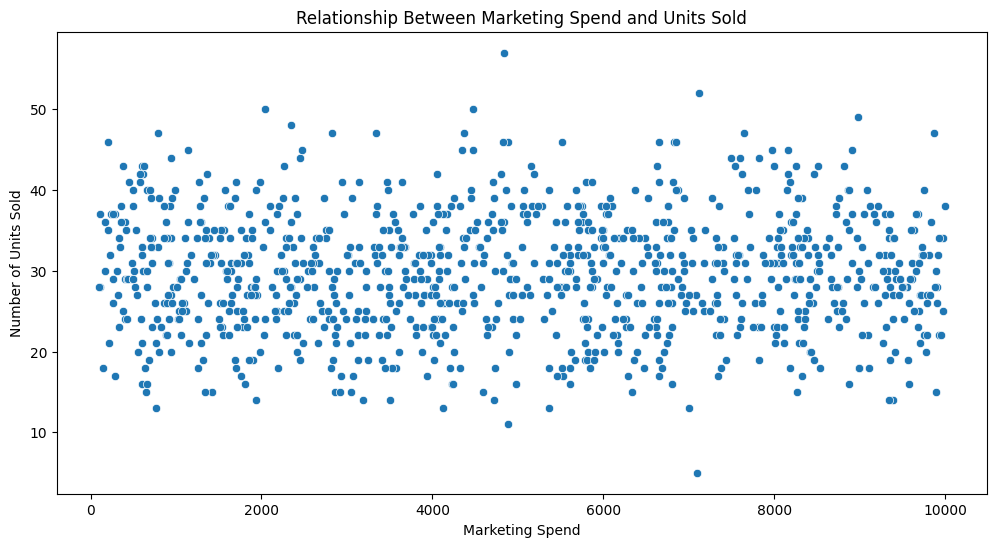

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Marketing_Spend', y='Units_Sold', palette='Set2')
plt.title('Relationship Between Marketing Spend and Units Sold')
plt.xlabel('Marketing Spend')
plt.ylabel('Number of Units Sold')
plt.show()

### Sales Trends Over Time

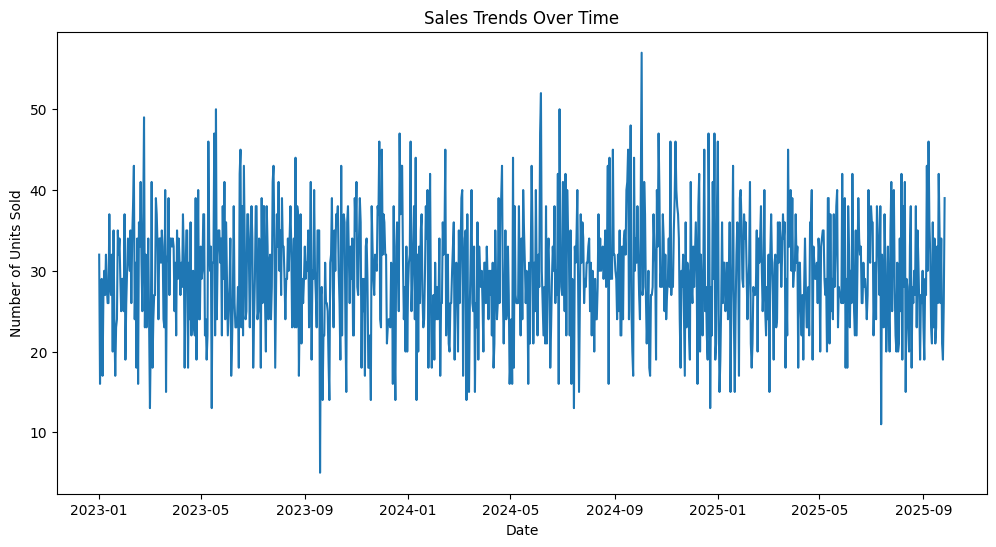

In [15]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Units_Sold')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Units Sold')
plt.show()

### Sales Distribution by Product Category and Customer Segment

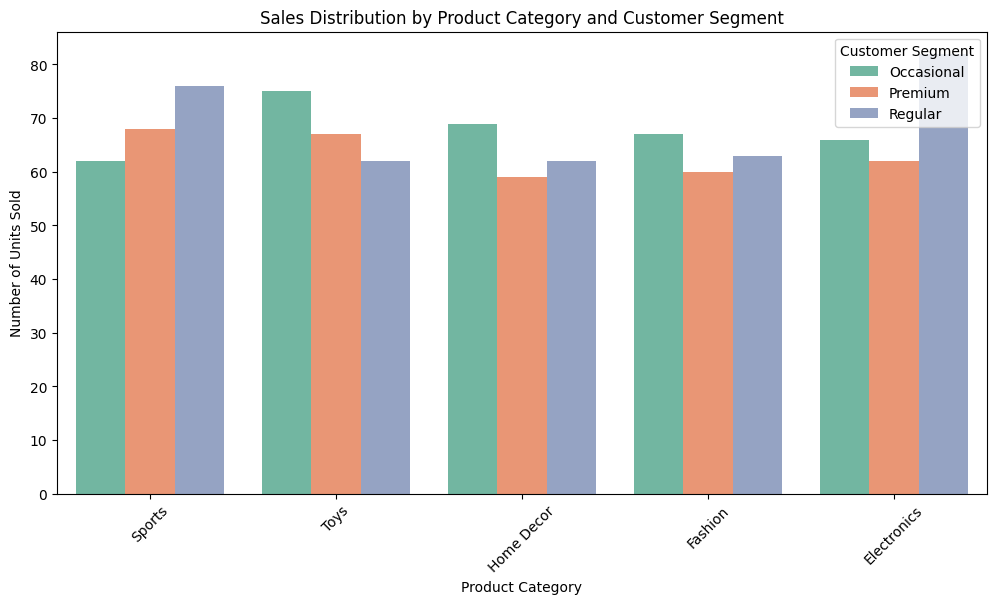

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product_Category', hue='Customer_Segment', palette='Set2')
plt.title('Sales Distribution by Product Category and Customer Segment')
plt.xlabel('Product Category')
plt.ylabel('Number of Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.show()

### Boxplot of Price by Product Category

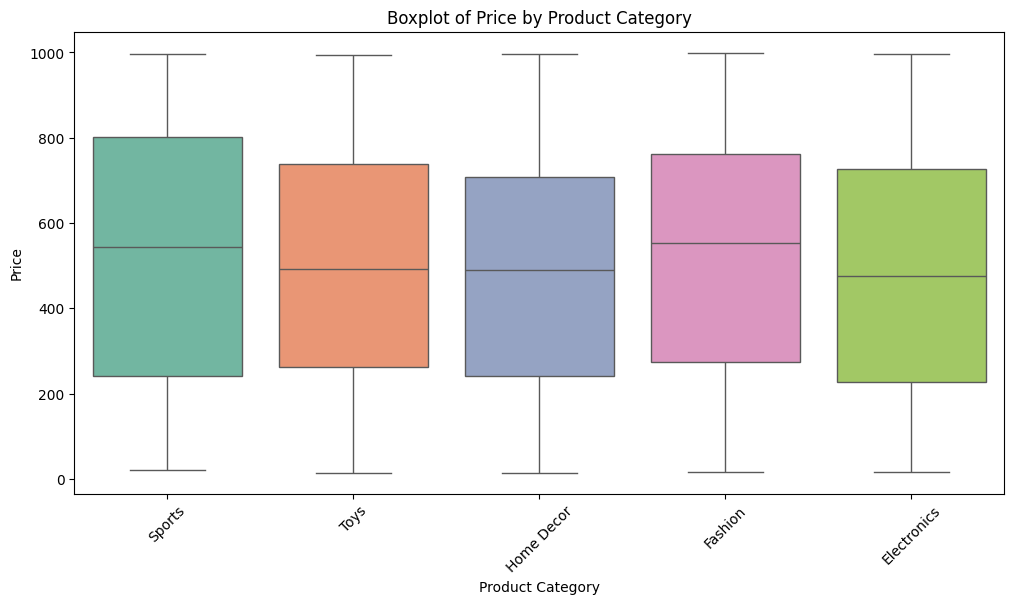

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product_Category', y='Price', palette='Set2')
plt.title('Boxplot of Price by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

### Pairplot of Numerical Features

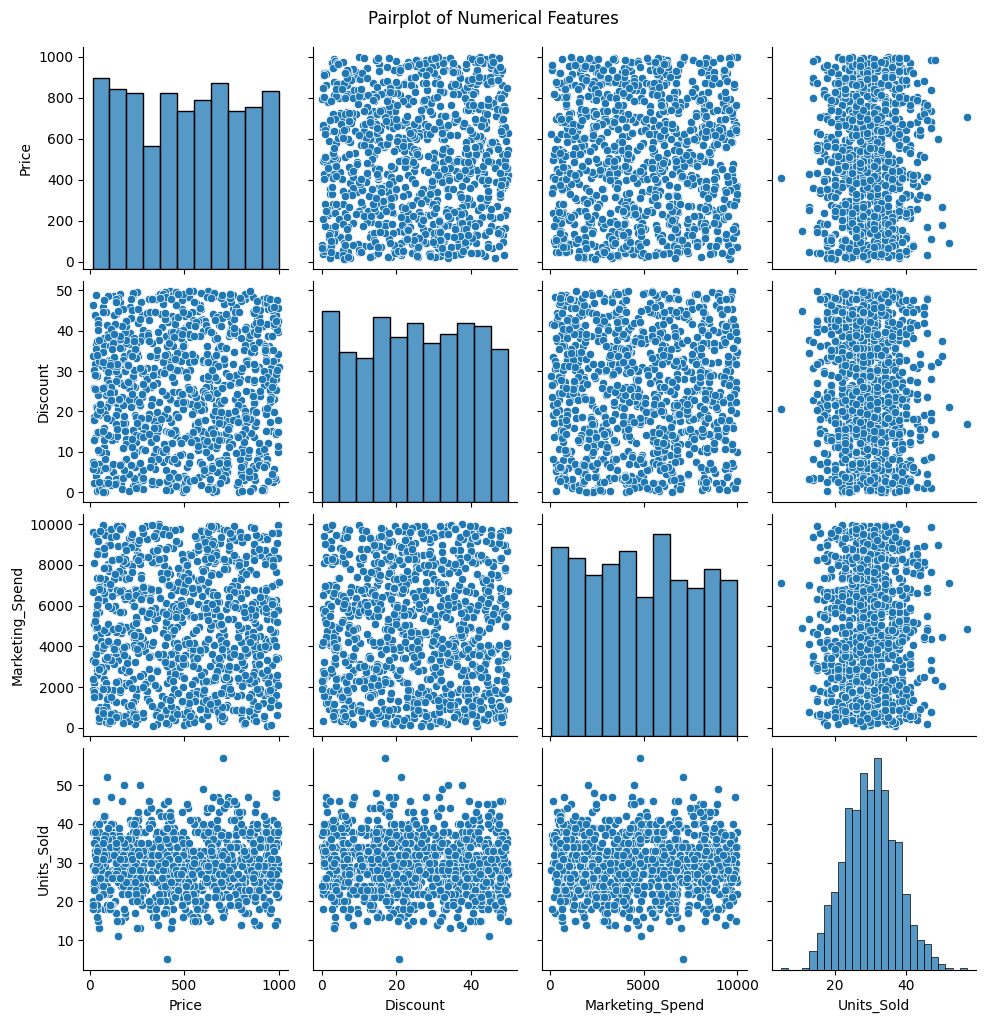

In [18]:
sns.pairplot(df, vars=['Price', 'Discount', 'Marketing_Spend', 'Units_Sold'])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

### Distribution of Marketing Spend by Customer Segment

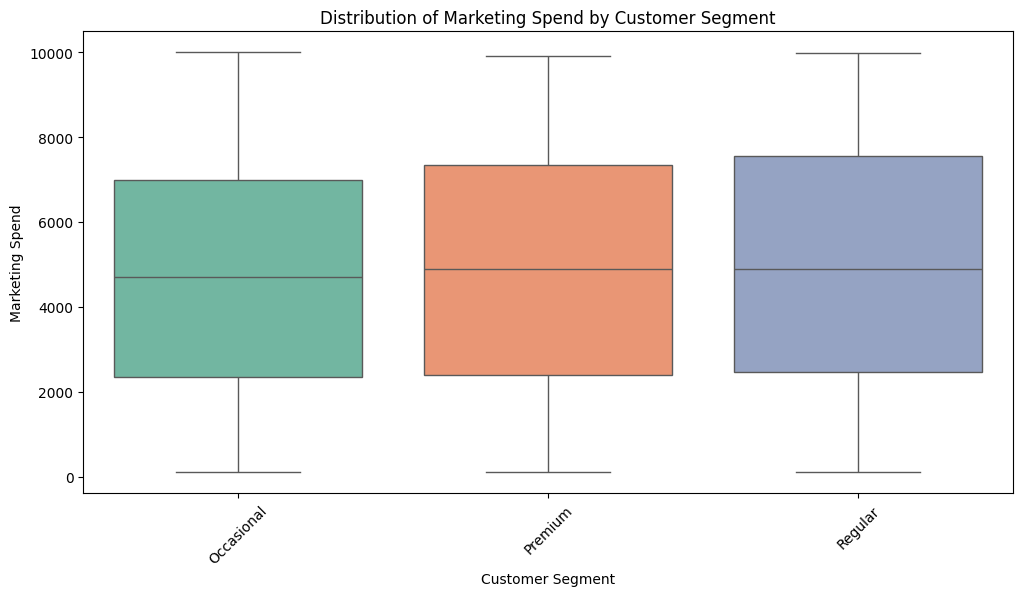

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Customer_Segment', y='Marketing_Spend', palette = 'Set2')
plt.title('Distribution of Marketing Spend by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Marketing Spend')
plt.xticks(rotation=45)
plt.show()

### Units Sold Over Time by Product Category

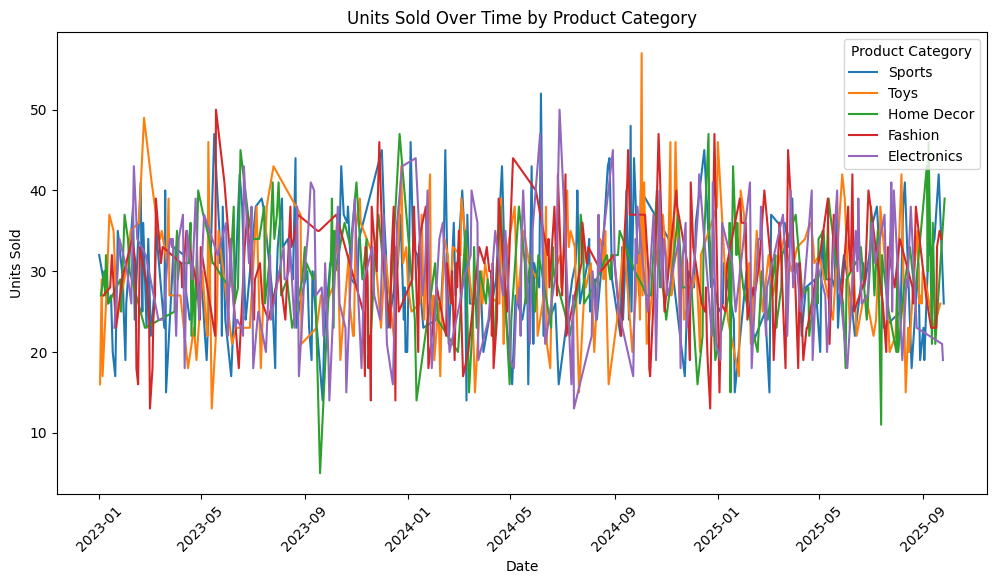

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Units_Sold', hue='Product_Category')
plt.title('Units Sold Over Time by Product Category')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

### Discount Distribution by Product Category

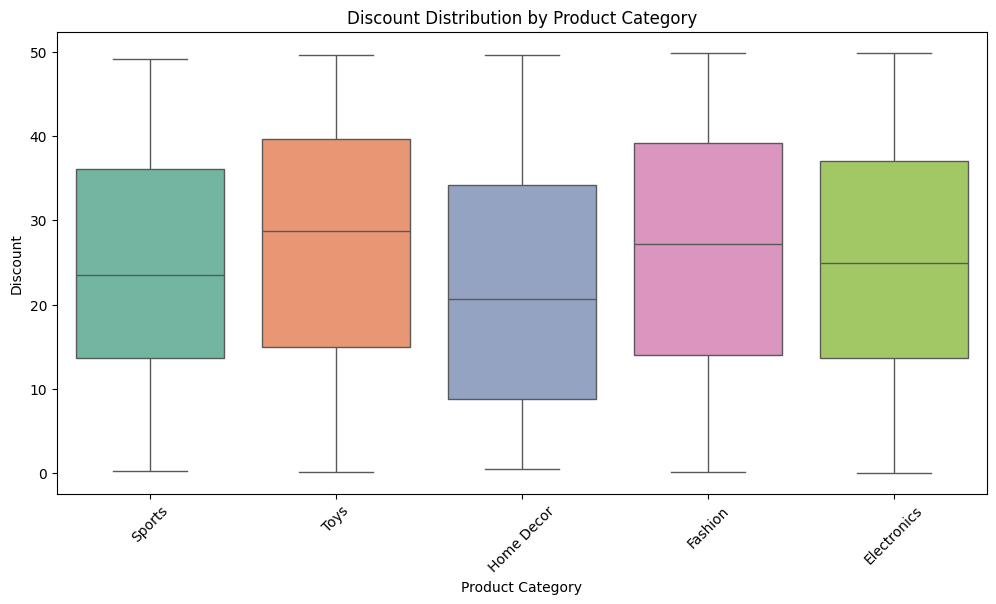

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product_Category', y='Discount',palette = 'Set2')
plt.title('Discount Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Discount')
plt.xticks(rotation=45)
plt.show()

In [25]:
# تحويل الأعمدة الفئوية
df_encoded = pd.get_dummies(df, columns=['Product_Category', 'Customer_Segment'])

df_encoded['Date'] = pd.to_datetime(df_encoded['Date'])
df_encoded['Month'] = df_encoded['Date'].dt.month
df_encoded['Weekday'] = df_encoded['Date'].dt.weekday

In [26]:
X = df_encoded.drop(columns=['Units_Sold', 'Date'])  # كل الأعمدة ماعدا Target
y = df_encoded['Units_Sold']

Train/Test Split

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 6.068907871403453
R²: -0.07525341814824249


In [30]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)

In [31]:
import joblib
joblib.dump(model, 'sales_prediction_model_improved.pkl')

['sales_prediction_model_improved.pkl']